### Explore the Network analysis of items 

In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [3]:
orders = pd.read_csv('../data/full_data.csv',low_memory=False)
orders.columns = [c.lower() for c in orders.columns]
orders.head(3)

,orderid,userid,restaurantid,date,rating,comments,address,count,itemid,price,viewcount,name,description,searchvector,type
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main


In [27]:
orderids = list(orders.orderid.values)
items = list(orders.name.values)
X = nx.Graph(data = True)

for i in range(len(orderids) - 1):
    start = i+1
    for j in range(start, len(orderids) - 1):
        node1 = items[i]
        node2 = items[j]
        if orderids[i] == orderids[j]:
            if node1 in X:
                if X.has_edge(node1,node2):
                    weight = X[node1][node2]['weight']
                    X[node1][node2]['weight'] = weight + 1
                else:
                    X.add_edge(node1,node2,weight = 1)   
            else:
                 X.add_edge(node1,node2,weight = 1)
        X.add_node(node1)         

In [28]:
total_edges = sorted(X.edges(data=True), key=lambda t: t[2].get('weight'),reverse=True)
total_edges
total_edges = sorted(X.edges('Joojeh Kabab With Rice',data=True), key=lambda t: t[2].get('weight'),reverse=True)
total_edges

[('Joojeh Kabab With Rice', 'Koobideh Kabab With Rice', {'weight': 232}),
 ('Joojeh Kabab With Rice', 'Ghormeh Sabzi Stew With Rice', {'weight': 37}),
 ('Joojeh Kabab With Rice', 'Shirazi Salad', {'weight': 34}),
 ('Joojeh Kabab With Rice', 'Gheymeh Stew With Rice', {'weight': 25}),
 ('Joojeh Kabab With Rice', 'Kashk Bademjan', {'weight': 24}),
 ('Joojeh Kabab With Rice', 'Vaziri Kabab With Rice', {'weight': 23}),
 ('Joojeh Kabab With Rice', 'Lamb Shank With White Rice', {'weight': 18}),
 ('Joojeh Kabab With Rice', 'Maast O Khiar', {'weight': 11}),
 ('Joojeh Kabab With Rice', 'Hummus', {'weight': 10}),
 ('Joojeh Kabab With Rice', 'Extra Bread', {'weight': 9}),
 ('Joojeh Kabab With Rice', 'Maast Chekideh - Yogurt', {'weight': 8}),
 ('Joojeh Kabab With Rice', 'Soft Drink', {'weight': 8}),
 ('Joojeh Kabab With Rice', 'Pistachio Baklava', {'weight': 8}),
 ('Joojeh Kabab With Rice', 'Shandiz Shish Kabab With Rice', {'weight': 6}),
 ('Joojeh Kabab With Rice', 'Special Pizza', {'weight': 6}),

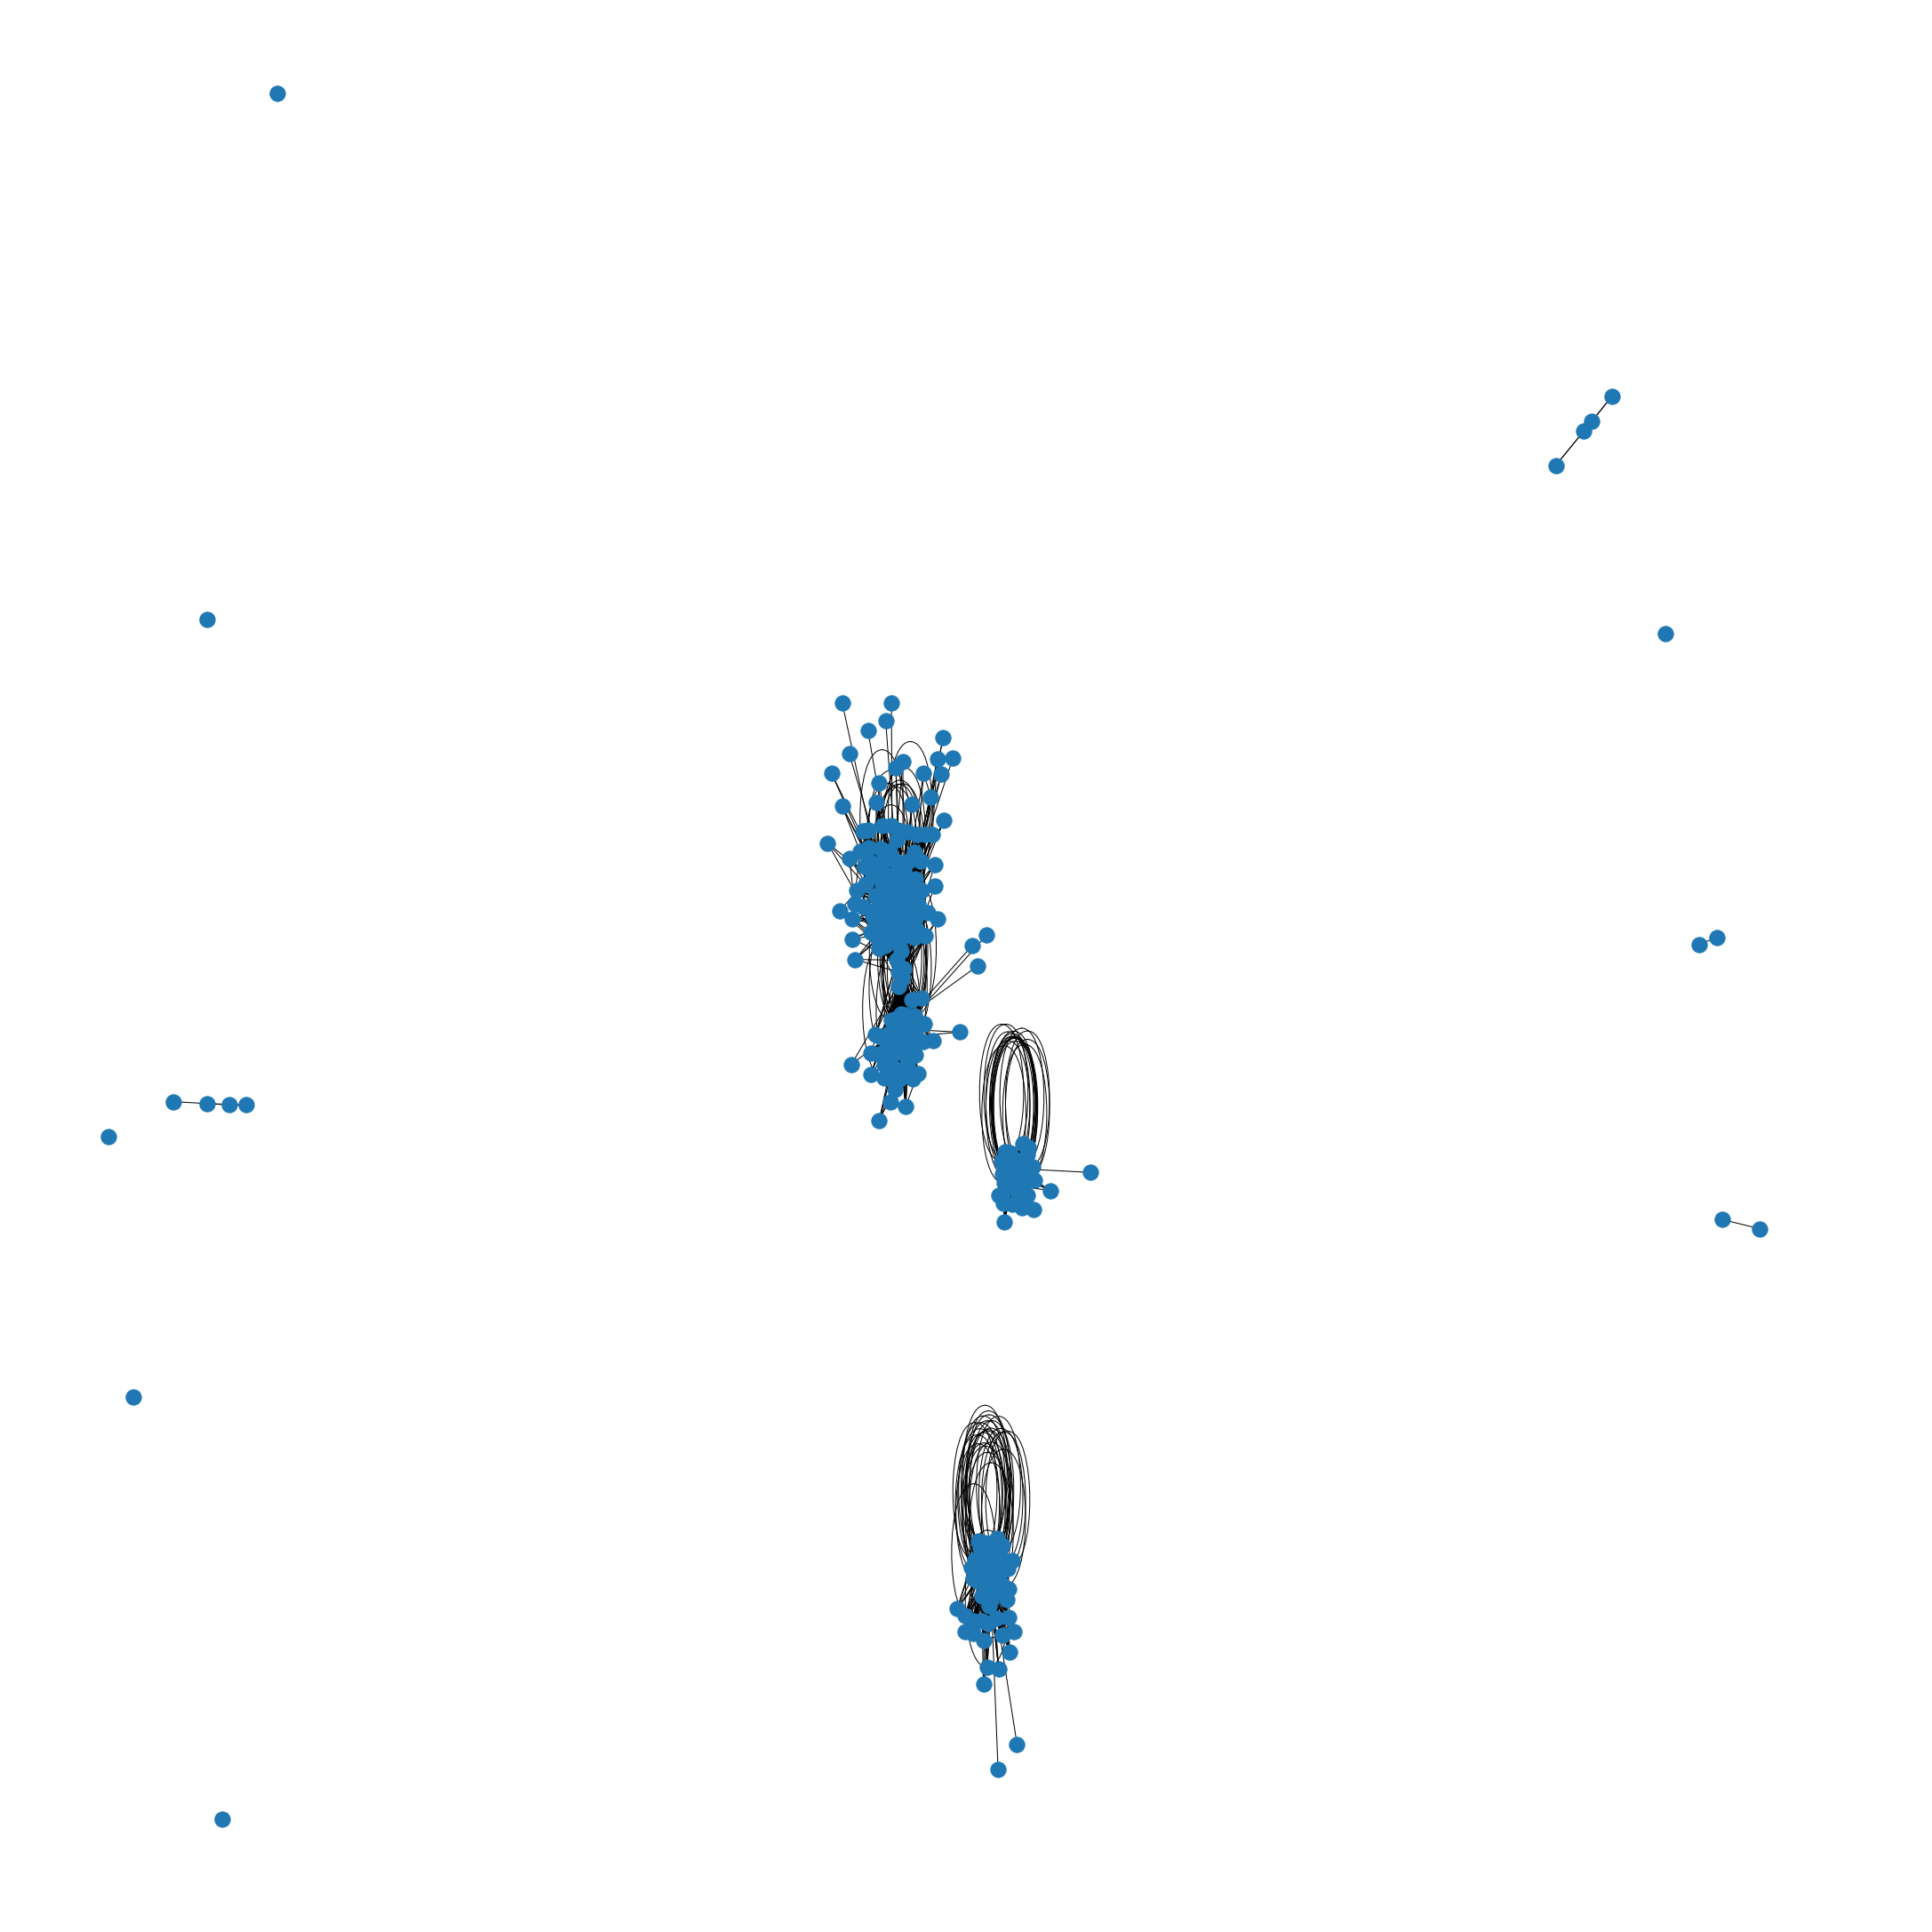

In [17]:
plt.figure(figsize = (30,30))
nx.draw(X)
plt.show()

In [29]:
def nodes_with_m_nbrs(G, m):
    nodes = set()
    for n in G.nodes():
        if len(list(G.neighbors(n))) > m:
            nodes.add(n)
    return nodes
six_nbrs = nodes_with_m_nbrs(X, 40)
print(six_nbrs)

{'Guacamole ', 'Choriqueso', 'Quesadilla', 'Crispy Free Run Chicken Sandwich', 'Chips And Salsa', 'Coca Cola', 'Powell Street, Ode to Citra  (473 Ml)', 'Hammer Hot Chicken', 'Pollo Taco', 'East Coast Lobster Roll', 'Paloma', 'Vaziri Kabab With Rice', 'Carnitas Taco', 'Lamb Shank', 'Asada Taco', 'Gin & Tonic', 'Ghormeh Sabzi Stew With Rice', 'Soft Drink', 'Tostada', 'Mirza Qassemi', 'Grilled Tomato', 'Extra Bread', 'Vodka Soda', 'Mar y Tierra Burrito', 'Rum & Coke', 'HH Shoestring Fries', 'Shirazi Salad', 'Nachos', 'Grass Fed BC Double Cheeseburger (8oz)', 'Skewer Of Koobideh Kabob', 'Azteca Soup', 'Popina Bottled Water', 'Joojeh Kabab With Rice', 'Kashk Bademjan', 'Lager Hoi Polloi', 'Enchiladas', 'Koobideh Kabab With Rice', 'Vaziri Kabob', 'Fish And Chips (G)', 'Sparkling Water', 'Grass Fed Bc Beef Cheesburger (4oz)', 'Shoestring Fries (G)', 'Chorizo Taco', 'Asada Burrito', 'Root Beer', 'Koobideh Kabob', 'B.C. Burrito', 'Gheymeh Stew With Rice', 'House Made Falafel Sandwich (ve)', 'Sh

In [37]:
sorted(X.edges('Gheymeh Stew With Rice',data=True), key= lambda x:x[2].get('weight'), reverse=True)

[('Gheymeh Stew With Rice', 'Koobideh Kabab With Rice', {'weight': 60}),
 ('Gheymeh Stew With Rice', 'Joojeh Kabab With Rice', {'weight': 25}),
 ('Gheymeh Stew With Rice', 'Ghormeh Sabzi Stew With Rice', {'weight': 20}),
 ('Gheymeh Stew With Rice', 'Kashk Bademjan', {'weight': 15}),
 ('Gheymeh Stew With Rice', 'Maast O Khiar', {'weight': 8}),
 ('Gheymeh Stew With Rice', 'Extra Bread', {'weight': 7}),
 ('Gheymeh Stew With Rice', 'Vaziri Kabab With Rice', {'weight': 6}),
 ('Gheymeh Stew With Rice', 'Shirazi Salad', {'weight': 5}),
 ('Gheymeh Stew With Rice', 'Ash Reshteh', {'weight': 4}),
 ('Gheymeh Stew With Rice', 'Dizi (abgosht)', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Baghali Ghatogh', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Borani Spinach', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Chicken Sandwich', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Falafel', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Koobideh Pizza', {'weight': 2}),
 ('Gheymeh Stew With Rice', 'Lamb Shan

In [39]:
degrees = [(n,len(list(X.neighbors(n)))) for n in X.nodes()]
degrees.sort(key = lambda x:x[1], reverse=True)
degrees

[('Koobideh Kabab With Rice', 93),
 ('Kashk Bademjan', 92),
 ('Skewer Of Koobideh Kabob', 77),
 ('Shirazi Salad', 76),
 ('Joojeh Kabab With Rice', 69),
 ('Guacamole ', 57),
 ('Azteca Soup', 56),
 ('Extra Bread', 55),
 ('Shoestring Fries (G)', 55),
 ('Nachos', 55),
 ('Enchiladas', 54),
 ('Carnitas Taco', 54),
 ('Shrimp Tacos', 53),
 ('Quesadilla', 53),
 ('Ghormeh Sabzi Stew With Rice', 52),
 ('Asada Taco', 52),
 ('Soft Drink', 51),
 ('Fish And Chips (G)', 51),
 ('Chips And Salsa', 51),
 ('Crispy Free Run Chicken Sandwich', 50),
 ('Extra salsa', 50),
 ('B.C. Burrito', 50),
 ('Grass Fed Bc Beef Cheesburger (4oz)', 49),
 ('Hammer Hot Chicken', 49),
 ('Tostada', 49),
 ('Koobideh Kabob', 49),
 ('Root Beer', 48),
 ('Ginger Ale', 48),
 ('Mirza Qassemi', 48),
 ('Chorizo Taco', 48),
 ('Popina Bottled Water', 47),
 ('Coca Cola', 47),
 ('East Coast Lobster Roll', 47),
 ('Crispy Fish Sandwich', 46),
 ('Grass Fed BC Double Cheeseburger (8oz)', 46),
 ('Lamb Shank', 46),
 ('House Made Falafel Sandwich

In [42]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            print(len(visited_nodes))
            return True
            break
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

        # Place the appropriate return statement
            return False


In [44]:
path_exists(X, 'Koobideh Kabab With Rice', 'Shirazi Salad')

Path exists between nodes Koobideh Kabab With Rice and Shirazi Salad
0


True

In [45]:
item_names = list(set(orders.name))

In [46]:
G = nx.Graph()
G.add_nodes_from(item_names)
G.nodes()

NodeView(('Lamb Shank With White Rice', 'Refried Beans', 'Vodka', 'Maast Chekideh - Yogurt', 'Pistachio Shake', 'Sasquatch Burrito', 'HH Shoestring Fries', 'Chicken Wings (10 Pcs)', 'Grass Fed BC Double Cheeseburger (8oz)', 'Azteca Soup', 'Dorchine', 'Vaziri Kabob', 'Bartier Bros, Merlot 9oz', 'Extra Butter', 'Maast O Khiar', 'King Crab', 'Grass Fed Bc Beef Cheesburger (4oz)', 'Zereshk Polo Ba Morgh ( Chicken)', 'Pozole', 'Kids Burrito', 'Walnut Baklava', 'Tinga De Pollo', 'Gamaji Kabab With Rice', 'Stella Artois', 'Rum', 'East Coast Lobster Roll', 'Flan De Cafe', 'Vaziri Kabab With Rice', 'Lamb Shank', 'Traditional Burrito', 'Sabzi Polo ba Mahi Ghazal', 'Grilled Tomatoes', 'Jadog', 'Sabzi Polo (Persian Herb Rice)', 'Dizi (abgosht)', 'Pistachio Baklava With Ice Cream', 'Corona Extra', 'Baghali Polo Ba Mahiche (lamb Shank)', 'Chicken With Bone (1 Skewer)', 'Grilled Chicken Pizza', 'Shrimp Burrito', 'Popcorn Chicken', 'Tostada', 'Rum & Coke', 'Brain And Tongue مغز و زبان ', 'Bamieh', 'Ho

In [47]:
H = nx.Graph()
H.add_nodes_from(sorted(G.nodes(data=True)))
H.add_edges_from(G.edges(data=True))

In [50]:
list(H.nodes())[:100]

[' Bartier Bros, Merlot (bottle)',
 '2 Enchiladas Special',
 '4 Tacos for 11',
 'Adas Polo',
 'Agave Burrito',
 'Ahogado Burrito',
 'Akbar Mashti Ice Cream',
 'Alambre',
 'Appetizer Platter',
 'Apple Juice',
 'Asada Burrito',
 'Asada Taco',
 'Ash Reshteh',
 'Azteca Soup',
 'B.C. Burrito',
 'Baghali Ghatogh',
 'Baghali Polo (Persian Dill Rice)',
 'Baghali Polo Ba Mahi (Salmon)',
 'Baghali Polo Ba Mahiche (lamb Shank)',
 'Baghali Polo Ba Morgh (chicken)',
 'Bakhtiari Kabab With Rice',
 'Bakhtiari Kabob',
 'Baklava',
 'Bamieh',
 'Banana Shake',
 'Bandari',
 'Barg Kabob',
 'Barg Kabob With Rice',
 'Barista',
 'Bartier Bros, Merlot 6oz',
 'Bartier Bros, Merlot 9oz',
 'Beef & Mushroom Pizza',
 'Bees Knees',
 'Birria',
 'Bistec A La Mexicana Taco',
 'Boneless Chicken Kebab',
 'Borani Bademjan',
 'Borani Spinach',
 'Brain And Tongue مغز و زبان ',
 'Budwiser',
 'Caesar Salad',
 'Cappuccino',
 'Carnitas Burrito',
 'Carnitas Taco',
 'Carrot Juice',
 'Cheese Pizza',
 'Chenjeh Kabob With Rice',
 'C

In [56]:
def recommend_addon(foodname):
    if foodname in X:
        options = list(X.neighbors(foodname))
        print(len(options))
        if len(options) > 0:
            return random.choice(options)
        else:
            return 'Oops no adds on!'
    else:
        return 'node not found!'        
    
recommend_addon('Kotlet')

16


'Gheymeh Stew With Rice'

In [ ]:
degrees = [(n,len(list(G.neighbors(n)))) for n in G.nodes()]
degrees.sort(key = lambda x:x[1], reverse=True)
degrees